In [3]:
# Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
notas = pd.read_csv("Base de Dados/ml-latest-small/ratings.csv") # importar os dados  

In [5]:
notas.shape # Formato do data Frame

(100836, 4)

In [6]:
notas.head() # aqs 5 primeiras linhas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"] # Trocar os nomes das colunas
notas.head() 

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
notas.nota.unique() # Descrever quais são os valores unicos

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
notas.nota.value_counts() # Contar quantas vezes valores unicos se repetem

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [10]:
print("Media", notas['nota'].mean()) # media
print("Mediana", notas['nota'].median()) # Mediana

Media 3.501556983616962
Mediana 3.5


In [11]:
notas.query("filmeId == 1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [12]:
df_filmes = pd.read_csv("Base de Dados//ml-latest-small//movies.csv")
df_filmes.columns = ["filmeId", "titulo", "genero"]
df_filmes.head


<bound method NDFrame.head of       filmeId                                     titulo  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genero  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama

In [13]:
df_filmes

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


# Agrupando os dados

In [14]:
medias_por_filme = notas.groupby("filmeId").mean()["nota"] # Criando uma variavel para comportar os valores da media das notas de cada filme

<Axes: title={'center': 'Notas legais'}, ylabel='Frequency'>

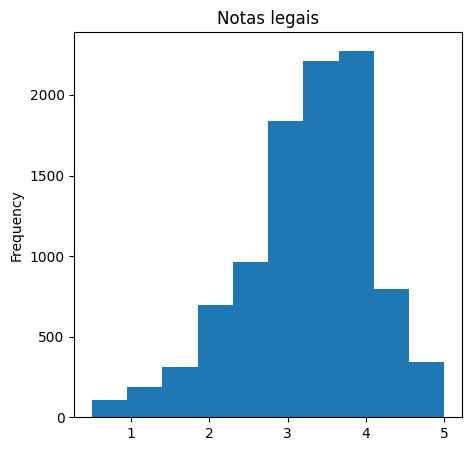

In [15]:
plt.figure(figsize=(5,5))
plt.title("Notas legais")
medias_por_filme.plot(kind="hist")


<Axes: ylabel='nota'>

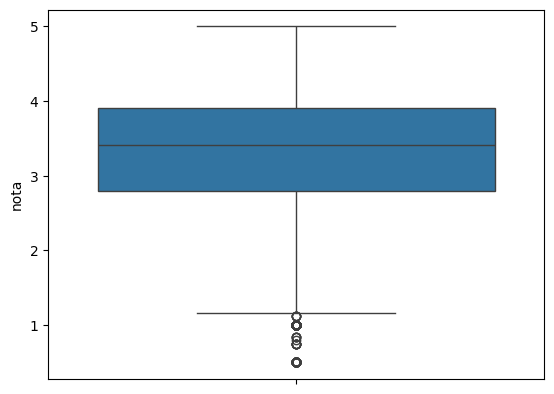

In [16]:
sns.boxplot(y=medias_por_filme)

<Figure size 2100x2100 with 0 Axes>

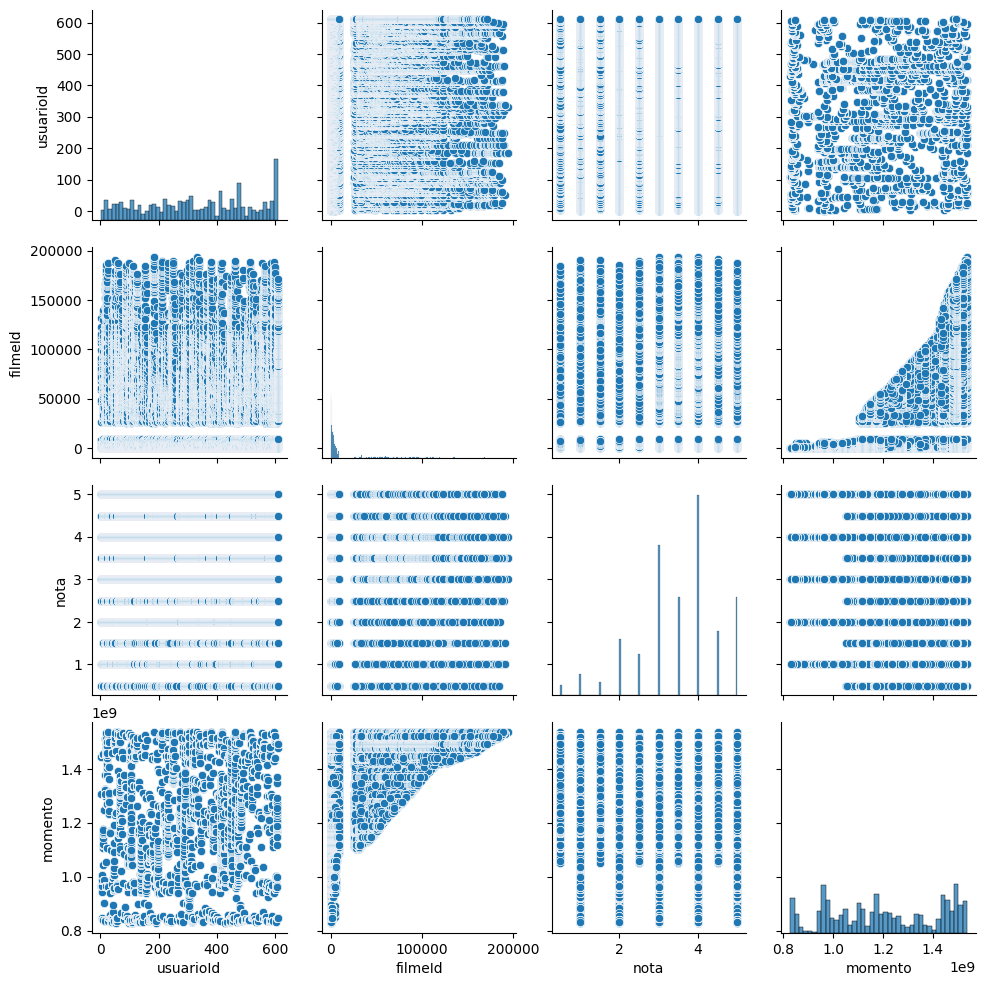

In [17]:
plt.figure(figsize=(21,21))
sns.pairplot(notas)

<Axes: xlabel='nota', ylabel='Density'>

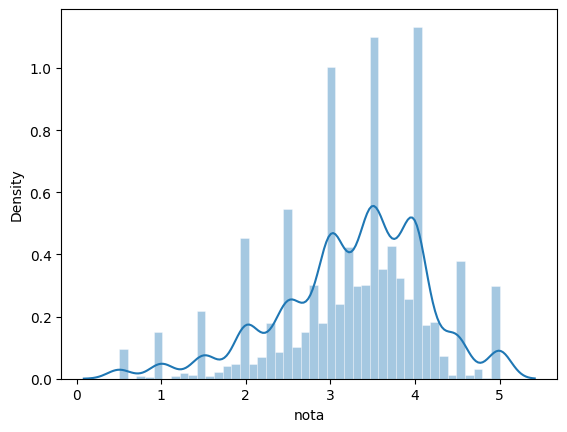

In [18]:
sns.histplot(
    medias_por_filme, kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

In [19]:
import numpy as np

A = np.array([0,0,1])
B = np.array([1,1,0])

Pesos = np.array([0.4, -0.6, 0.6])
eta = 0.4
bias = 0.5

def somaPonderada(X,W):
    bias = 0.5
    m = np.multiply(X,W)
    u = np.sum(m) -1*bias
    return u

def funcaoAtivacao(u):
    if u >= 0:
        return 1
    else:
        return -1
    
def saida(X,W):
    u = somaPonderada(X,W)
    return funcaoAtivacao(u)


def ajustaPesos(eta, W, X, bias, d, y):
    e = d - y
    novoW = W + eta*X*e
    novoB = bias + eta*(-1)*e
    return novoW, novoB



d = -1
y = saida(A, Pesos)
print(y)

Pesos,bias = ajustaPesos(eta, Pesos, A, bias, d, y)
print(Pesos)
print(bias)

d = 1
y = saida(B, Pesos)
print(y)

Pesos, bias = ajustaPesos(eta, Pesos, B, bias, d, y)
print(Pesos)
print(bias)



1
[ 0.4 -0.6 -0.2]
1.3
-1
[ 1.2  0.2 -0.2]
0.5


In [20]:

d = - 1
y = saida(A, Pesos)
print(y)

Pesos,bias = ajustaPesos(eta, Pesos, A, bias, d, y)
print(Pesos)
print(bias)



d = 1
y = saida(B, Pesos)
print(y)

Pesos, bias = ajustaPesos(eta, Pesos, B, bias, d, y)
print(Pesos)
print(bias)

-1
[ 1.2  0.2 -0.2]
0.5
1
[ 1.2  0.2 -0.2]
0.5


In [21]:
T = np.array([1,1,1])
print("Saida para")

Saida para


In [22]:
tmdb = pd.read_csv("Base de Dados//tmdb_5000_movies.csv")

In [23]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [24]:
contagemDeLingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagemDeLingua.columns = ["Lingua_Original", "total"]
contagemDeLingua.head()

,Lingua_Original,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='Lingua_Original', ylabel='total'>

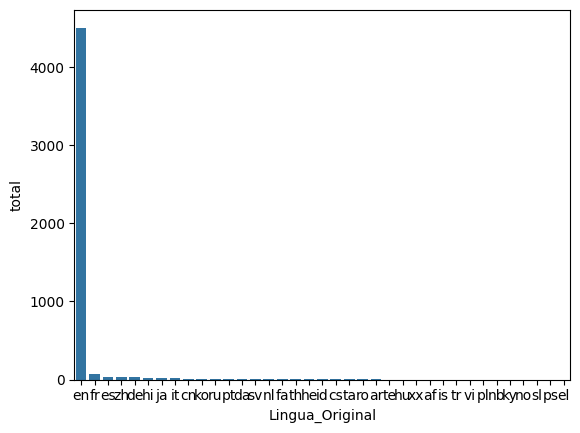

In [25]:
sns.barplot(x="Lingua_Original" , y = "total" , data=contagemDeLingua)

([<matplotlib.patches.Wedge at 0x1b83a972a50>,
 [Text(-1.0791697944848757, 0.21305528548118974, 'en'),
  Text(1.0355355060813987, -0.371033981792425, 'fr'),
  Text(1.0579676532751783, -0.30117178590202043, 'es'),
  Text(1.0687996896821872, -0.2601292435218708, 'zh'),
  Text(1.0773192231958597, -0.22222351660584796, 'de'),
  Text(1.0835168605253713, -0.18971350230609152, 'hi'),
  Text(1.0875755883723952, -0.16486157701671572, 'ja'),
  Text(1.0906010458121063, -0.14348992603503677, 'it'),
  Text(1.092883468191142, -0.12492287602557497, 'cn'),
  Text(1.094639090663068, -0.10846778873163951, 'ko'),
  Text(1.0960865548595407, -0.0927052547385707, 'ru'),
  Text(1.097205502470541, -0.078358696699014, 'pt'),
  Text(1.0979654406138135, -0.06687220063460171, 'da'),
  Text(1.0984565068410161, -0.05825206072434674, 'sv'),
  Text(1.0987803772611597, -0.05178496447641595, 'nl'),
  Text(1.0990363134163792, -0.04603457170578121, 'fa'),
  Text(1.0992355467780295, -0.041002593815593756, 'th'),
  Text(1.

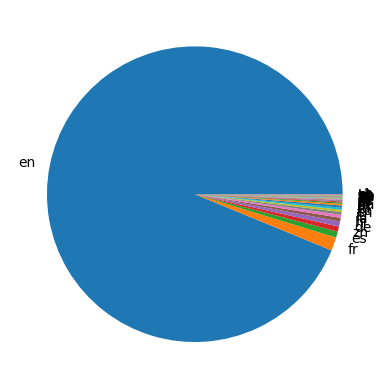

In [26]:
plt.pie(contagemDeLingua["total"], labels=contagemDeLingua["Lingua_Original"])

In [27]:
TotalPorLingua = tmdb["original_language"].value_counts()
TotalGeral = TotalPorLingua.sum()
totalIngles = TotalPorLingua.loc["en"]
totalResto = TotalGeral - totalIngles

In [28]:
print(totalIngles, totalResto)

4505 298


<Axes: xlabel='Linguas', ylabel='Total'>

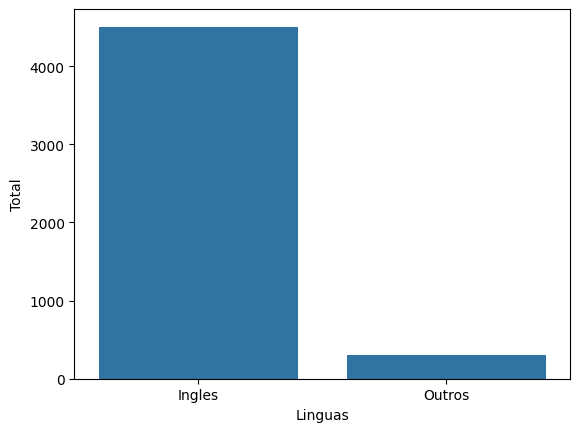

In [29]:
dadosParaOGrafico = {
    "Linguas" : ['Ingles', 'Outros'],
    "Total" : [totalIngles, totalResto]
}

sns.barplot(x='Linguas', y='Total', data=dadosParaOGrafico)

([<matplotlib.patches.Wedge at 0x1b839ea9d10>,
 [Text(-1.0791697944848757, 0.21305528548118974, 'Ingles'),
  Text(1.0791697115180023, -0.21305570572540808, 'Outros')])

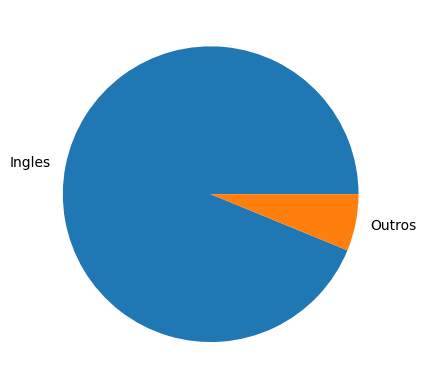

In [30]:
plt.pie(dadosParaOGrafico['Total'], labels=dadosParaOGrafico['Linguas'])

In [31]:
filmesquenãotemlinguaoriginalemlingles = tmdb.query("original_language != 'en'")


In [32]:
filmesquenãotemlinguaoriginalemlingles.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9


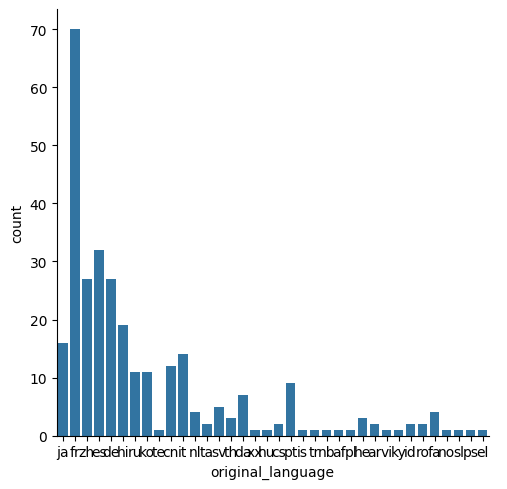

In [33]:
sns.catplot(x = "original_language", kind="count", data = filmesquenãotemlinguaoriginalemlingles)